In [19]:
# MIN-MAX Scaling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('wine_data.csv', usecols=[0, 1, 2])
df.columns = ['Class Level', 'Alcohol', 'Malic Acid']

In [4]:
df.head()

,Class Level,Alcohol,Malic Acid
0,1,13.20,1.78
1,1,13.16,2.36
2,1,14.37,1.95
3,1,13.24,2.59
4,1,14.20,1.76


<Axes: xlabel='Malic Acid', ylabel='Density'>

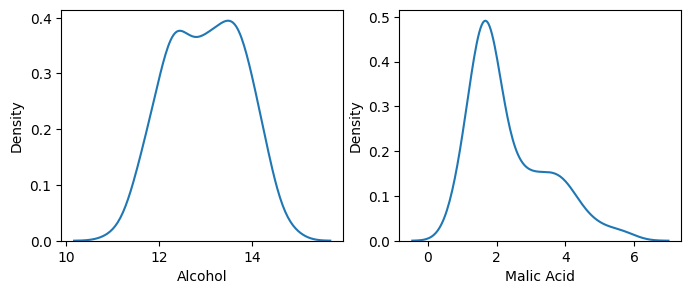

In [5]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,3))
sns.kdeplot(df['Alcohol'], ax = ax1)
sns.kdeplot(df['Malic Acid'], ax = ax2)

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

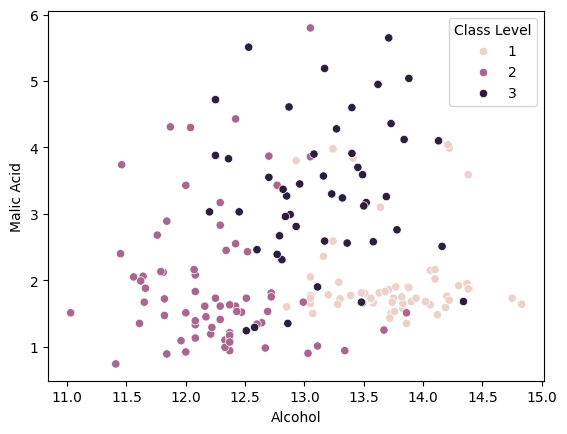

In [6]:
sns.scatterplot(x = df['Alcohol'], y = df['Malic Acid'], hue=df['Class Level'])

In [7]:
X = df.drop('Class Level', axis=1)
y = df['Class Level']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [9]:
X_train.shape

(123, 2)

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
scaler.fit(X_train)

MinMaxScaler()

In [13]:
X_trainscaled = scaler.transform(X_train)
X_testscaled  = scaler. transform(X_test)

In [14]:
X_trainscaled = pd.DataFrame(X_trainscaled, columns= X_train.columns)
X_testscaled = pd.DataFrame(X_testscaled, columns= X_test.columns)

In [15]:
np.round(X_train.describe(), 1)

,Alcohol,Malic Acid
count,123.0,123.0
mean,13.0,2.3
std,0.8,1.2
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.8
75%,13.6,3.1
max,14.8,5.8


In [16]:
np.round(X_trainscaled.describe(), 1)

,Alcohol,Malic Acid
count,123.0,123.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.1
50%,0.5,0.2
75%,0.7,0.4
max,1.0,1.0


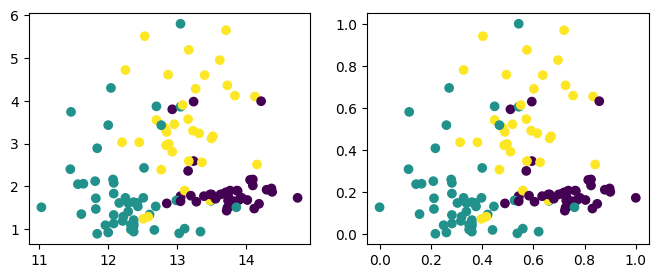

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (8,3))
ax1.scatter(X_train['Alcohol'], X_train['Malic Acid'], c = y_train)
ax2.scatter(X_trainscaled['Alcohol'], X_trainscaled['Malic Acid'], c = y_train)

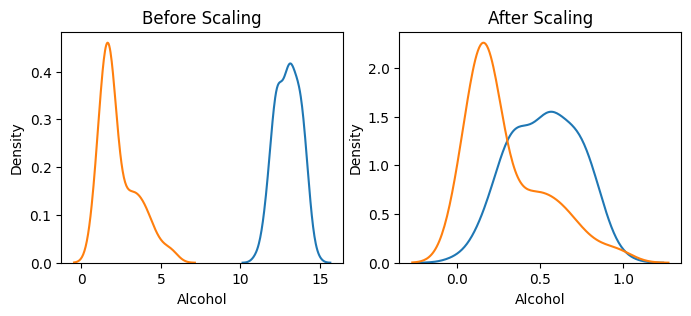

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (8,3))
sns.kdeplot(X_train['Alcohol'], ax = ax1)
sns.kdeplot(X_train['Malic Acid'], ax= ax1)
ax1.set_title('Before Scaling')
sns.kdeplot(X_trainscaled['Alcohol'], ax = ax2)
sns.kdeplot(X_trainscaled['Malic Acid'], ax= ax2)
ax2.set_title('After Scaling')
plt.show()